In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ExternalLinks:
    https://www.smev.in/statistics

In [2]:
url ='https://www.smev.in/statistics'

In [3]:
requests.get(url)

<Response [502]>

In [4]:
data = pd.read_html(url)

In [5]:
len(data)

6

In [6]:
df = pd.DataFrame(data[0])

In [7]:
df.head(5) # Change columns accordingly

Electric Vehicle Sales - Dashboard                                      \
                             Category                               17-18   
                             Category                               17-18   
0  Electric Vehicle Sales - Dashboard  Electric Vehicle Sales - Dashboard   
1                            Category                               17-18   
2                            Category                               17-18   
3                        E-2 Wheelers                                2005   
4                        E-3 Wheelers                               91970   

                                                                           \
                                18-19                               19-20   
                                18-19                               19-20   
0  Electric Vehicle Sales - Dashboard  Electric Vehicle Sales - Dashboard   
1                               18-19                               19-20   
2                               18-19                               19-20   
3                               28007                               26834   
4                              116031                              143051   

                                                                           \
                                20-21                               21-22   
                                20-21                               21-22   
0  Electric Vehicle Sales - Dashboard  Electric Vehicle Sales - Dashboard   
1                               20-21                               21-22   
2                               20-21                               21-22   
3                               44803                              252642   
4                               90898                              172543   

                                                                           \
                                22-23                               23-24   
                                22-23                               23-24   
0  Electric Vehicle Sales - Dashboard  Electric Vehicle Sales - Dashboard   
1                               22-23                               23-24   
2                               22-23                               23-24   
3                              728054                              944126   
4                              401882                              632485   

                                                                           \
                          Grand Total                               24-25   
                          Grand Total                                 Apr   
0  Electric Vehicle Sales - Dashboard  Electric Vehicle Sales - Dashboard   
1                         Grand Total                               24-25   
2                         Grand Total                                 Apr   
3                             2026471                               52921   
4                             1648860                               37152   

   Financial Year                  
            24-25          Apr'24  
               Q1          Apr'24  
0  Financial Year  Financial Year  
1           24-25          Apr'24  
2              Q1          Apr'24  
3           52921           52921  
4           37152           37152

In [8]:
category = list(df['Electric Vehicle Sales - Dashboard']['Category'][3:7]['Category'])

In [9]:
category

['E-2 Wheelers', 'E-3 Wheelers', 'E-4 Wheelers', 'E-Buses']

In [11]:
data1 = data[1:5]

In [12]:
for i,(df,cat) in enumerate(zip(data1,category)):
    col = df.columns[0][0]
    df_new = df[col]
    #print(df_new.columns)
    df_new = df_new.drop(['Unnamed: 15_level_1','Total'],axis=1)
    df_new['Category']= cat
    if(i ==0):
        df_evs = df_new
    else:
        df_evs = pd.concat([df_evs, df_new], axis=0)

In [13]:
df_evs = df_evs.reset_index()

In [14]:
df_evs = df_evs.drop(['index','S.No','S No'], axis=1)

In [15]:
df_evs.head()

,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Category
0,FY18,96,91.0,137.0,116.0,99.0,109.0,160.0,214.0,189.0,176.0,156.0,462.0,E-2 Wheelers
1,FY19,486,681.0,955.0,1281.0,1570.0,2258.0,2560.0,3311.0,3171.0,2745.0,3121.0,5868.0,E-2 Wheelers
2,FY20,3079,1668.0,1758.0,1568.0,1507.0,1558.0,2136.0,3147.0,2235.0,2942.0,2353.0,2883.0,E-2 Wheelers
3,FY21,85,558.0,1511.0,1488.0,2115.0,3089.0,2953.0,4188.0,4948.0,5319.0,6579.0,11970.0,E-2 Wheelers
4,FY22,5636,1315.0,4751.0,14692.0,16099.0,17959.0,20704.0,24503.0,26862.0,30041.0,35759.0,54320.0,E-2 Wheelers


In [16]:
df_evs.shape

(32, 14)

In [17]:
df_evs.fillna(0).head()

,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Category
0,FY18,96,91.0,137.0,116.0,99.0,109.0,160.0,214.0,189.0,176.0,156.0,462.0,E-2 Wheelers
1,FY19,486,681.0,955.0,1281.0,1570.0,2258.0,2560.0,3311.0,3171.0,2745.0,3121.0,5868.0,E-2 Wheelers
2,FY20,3079,1668.0,1758.0,1568.0,1507.0,1558.0,2136.0,3147.0,2235.0,2942.0,2353.0,2883.0,E-2 Wheelers
3,FY21,85,558.0,1511.0,1488.0,2115.0,3089.0,2953.0,4188.0,4948.0,5319.0,6579.0,11970.0,E-2 Wheelers
4,FY22,5636,1315.0,4751.0,14692.0,16099.0,17959.0,20704.0,24503.0,26862.0,30041.0,35759.0,54320.0,E-2 Wheelers


In [18]:
df_evs['total_sales'] = df_evs['Apr']+df_evs['May']+df_evs['Jun']+df_evs['Jul']+df_evs['Aug']+df_evs['Sep']+df_evs['Oct']+df_evs['Nov']+df_evs['Dec']+df_evs['Jan']+df_evs['Feb']+df_evs['Mar'] 

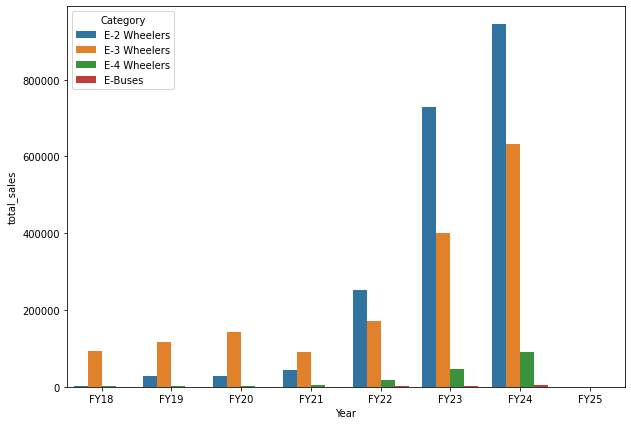

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_evs['Year'],y = df_evs['total_sales'], hue = df_evs['Category'])
plt.show()

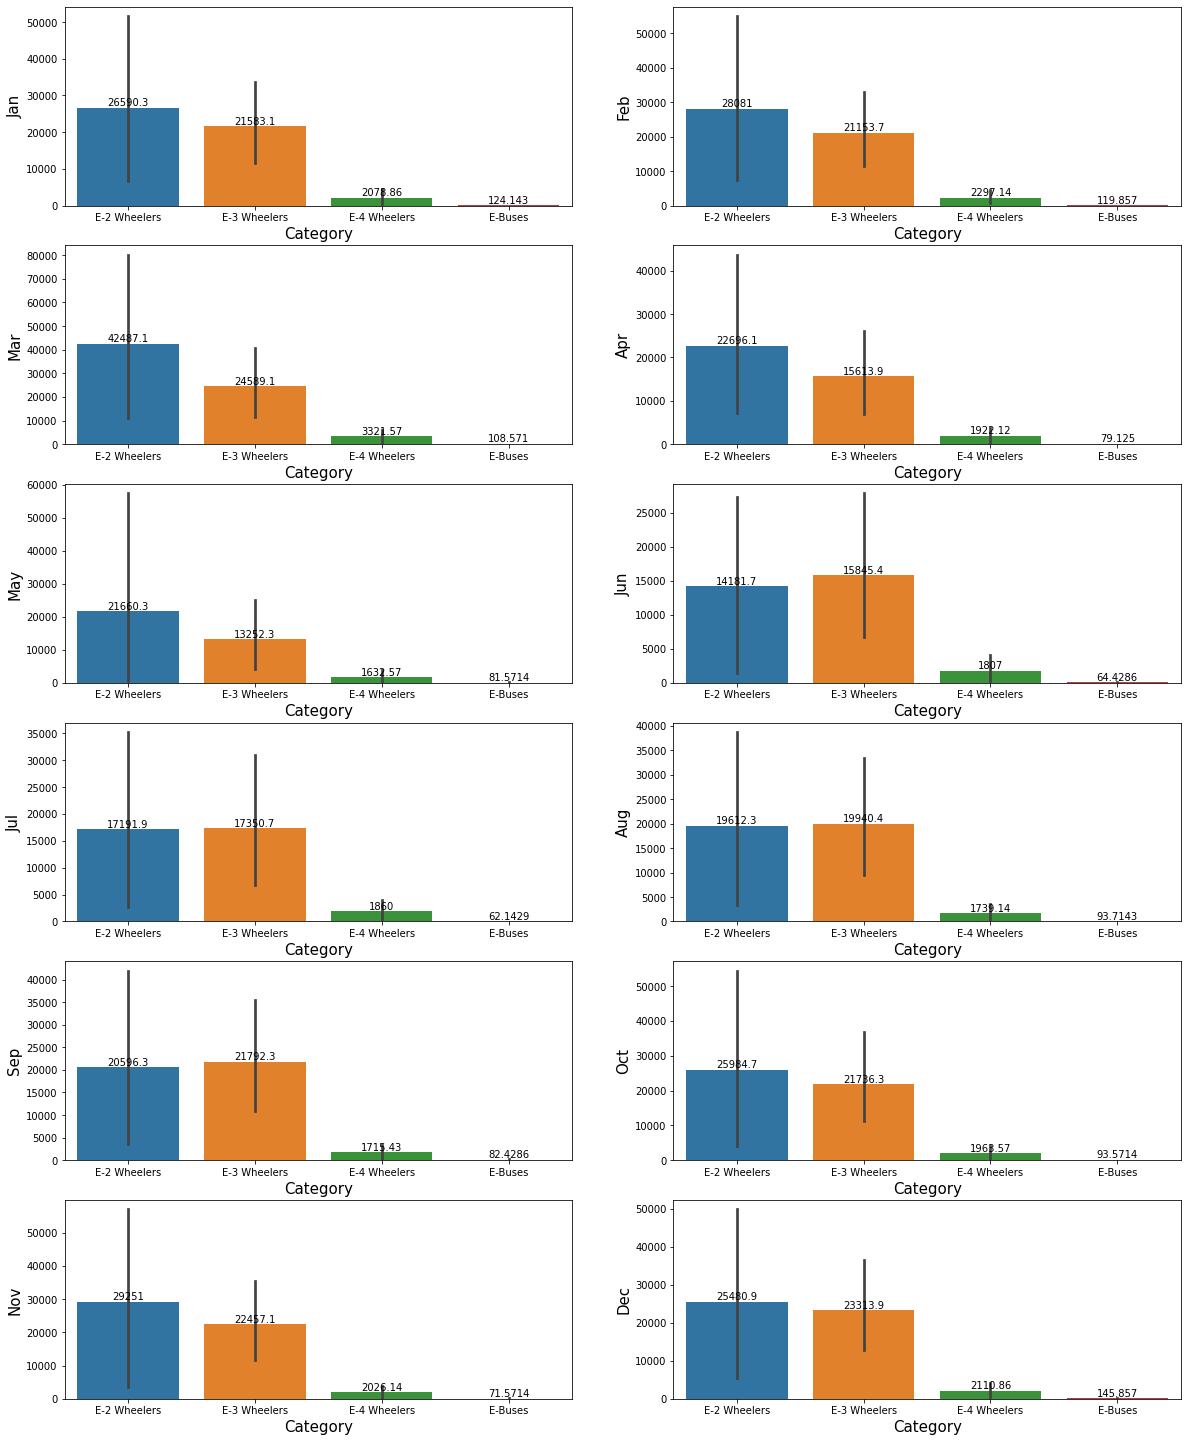

In [20]:
months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(20,30))
for i,month in enumerate(months):
    plt.subplot(int(len(months)/2 +1), 2, i+1)
    f = sns.barplot(x=df_evs['Category'],y = df_evs[month])
    f.bar_label(f.containers[0],fontsize=10)
    plt.xlabel("Category", fontsize=15)
    plt.ylabel(month, fontsize=15)
plt.show()